# Импорты

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
from fastai.vision import *
from fastai.vision.data import *
from fastai.vision.augment import aug_transforms
from fastai.metrics import error_rate
from pathlib import Path
from fastai.vision.all import *

import numpy as np

In [3]:
bs = 64
np.random.seed(42)

# Подготовка датасета

Датасет подготовлен с помощью парсинга этих сабреддитов:

- r/akita

- r/shiba

- r/basset

- r/corgi

- r/husky

В итоге получилось собрать датасет где-то по 1000-1500 картинок каждой из данных пород хобак.

Чтобы найти повторные картинки (иногда постят одни и те изображения), был использован [diwork](https://github.com/The220th/diwork).

``` bash
> diwork repeats /path/to/dataset
```

В итоге получился архив состоящий только из изображений весом `6.5 GB`. В архиве 5 папок с названиями пород, в каждой папке из которых 1000-1500 изображений хобак данной породы.


In [4]:
path = Path('dataset')
path.ls()

(#5) [Path('dataset/shiba'),Path('dataset/akita'),Path('dataset/basset'),Path('dataset/corgi'),Path('dataset/husky')]

In [ ]:
#get_image_files(path)

In [13]:
help(aug_transforms)

Help on function aug_transforms in module fastai.vision.augment:

aug_transforms(mult: 'float' = 1.0, do_flip: 'bool' = True, flip_vert: 'bool' = False, max_rotate: 'float' = 10.0, min_zoom: 'float' = 1.0, max_zoom: 'float' = 1.1, max_lighting: 'float' = 0.2, max_warp: 'float' = 0.2, p_affine: 'float' = 0.75, p_lighting: 'float' = 0.75, xtra_tfms: 'list' = None, size: 'int | tuple' = None, mode: 'str' = 'bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)
    Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.



In [5]:
#data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2,
#        ds_tfms=aug_transforms(), bs=bs, size=224).normalize(imagenet_stats)
SIZE=224
ds_tfms_buff = aug_transforms()
data = ImageDataLoaders.from_folder(path, valid_pct=0.2, bs=bs, size=SIZE, item_tfms=Resize(SIZE), ds_tfms=ds_tfms_buff)

#def get_mylabel(x):
#    print(x)
#    print(type(x))
#    return True

#dls = ImageDataLoaders.from_name_func(
#    path, get_image_files(path), valid_pct=0.2, seed=42,
#    label_func=get_mylabel, item_tfms=Resize(224))

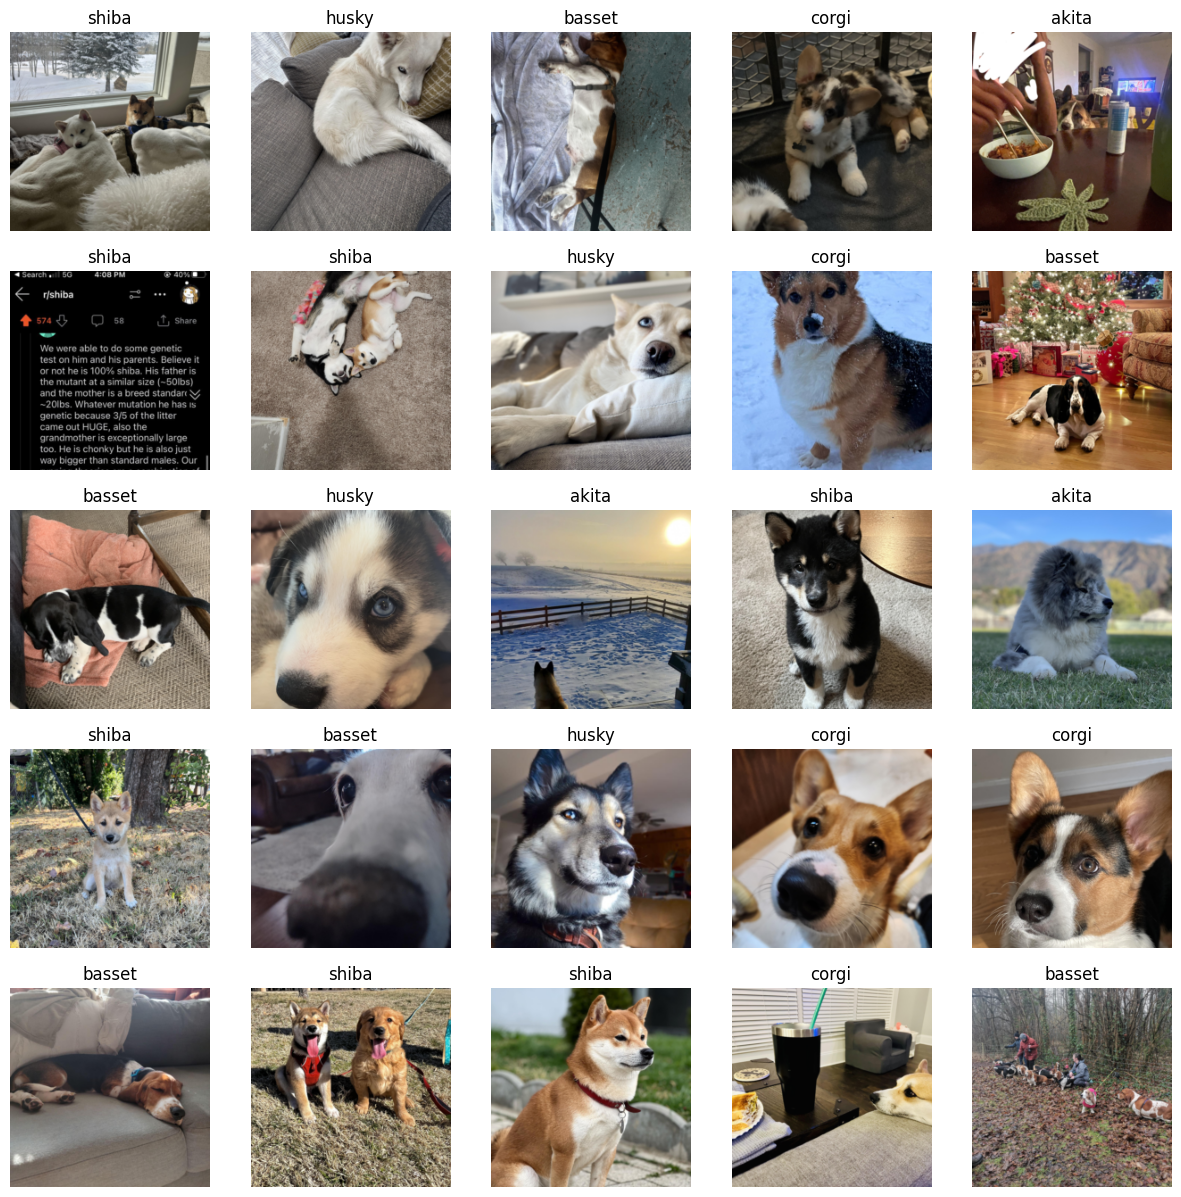

In [12]:
data.show_batch(max_n=25, nrows=5, ncols=5)

In [7]:
data.n

4845

In [8]:
data.c

5

In [9]:
data.bs

64

In [10]:
data.device

device(type='cuda', index=0)

# Трансферное обучение

## resnet34

In [ ]:
help(vision_learner)

In [14]:
#learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn = vision_learner(data, resnet34, metrics=error_rate)

/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
learn.fit_one_cycle(4)

/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (98397000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (98397000 pixels) e

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [ ]:
help(interp.plot_top_losses)

In [ ]:
help(interp)

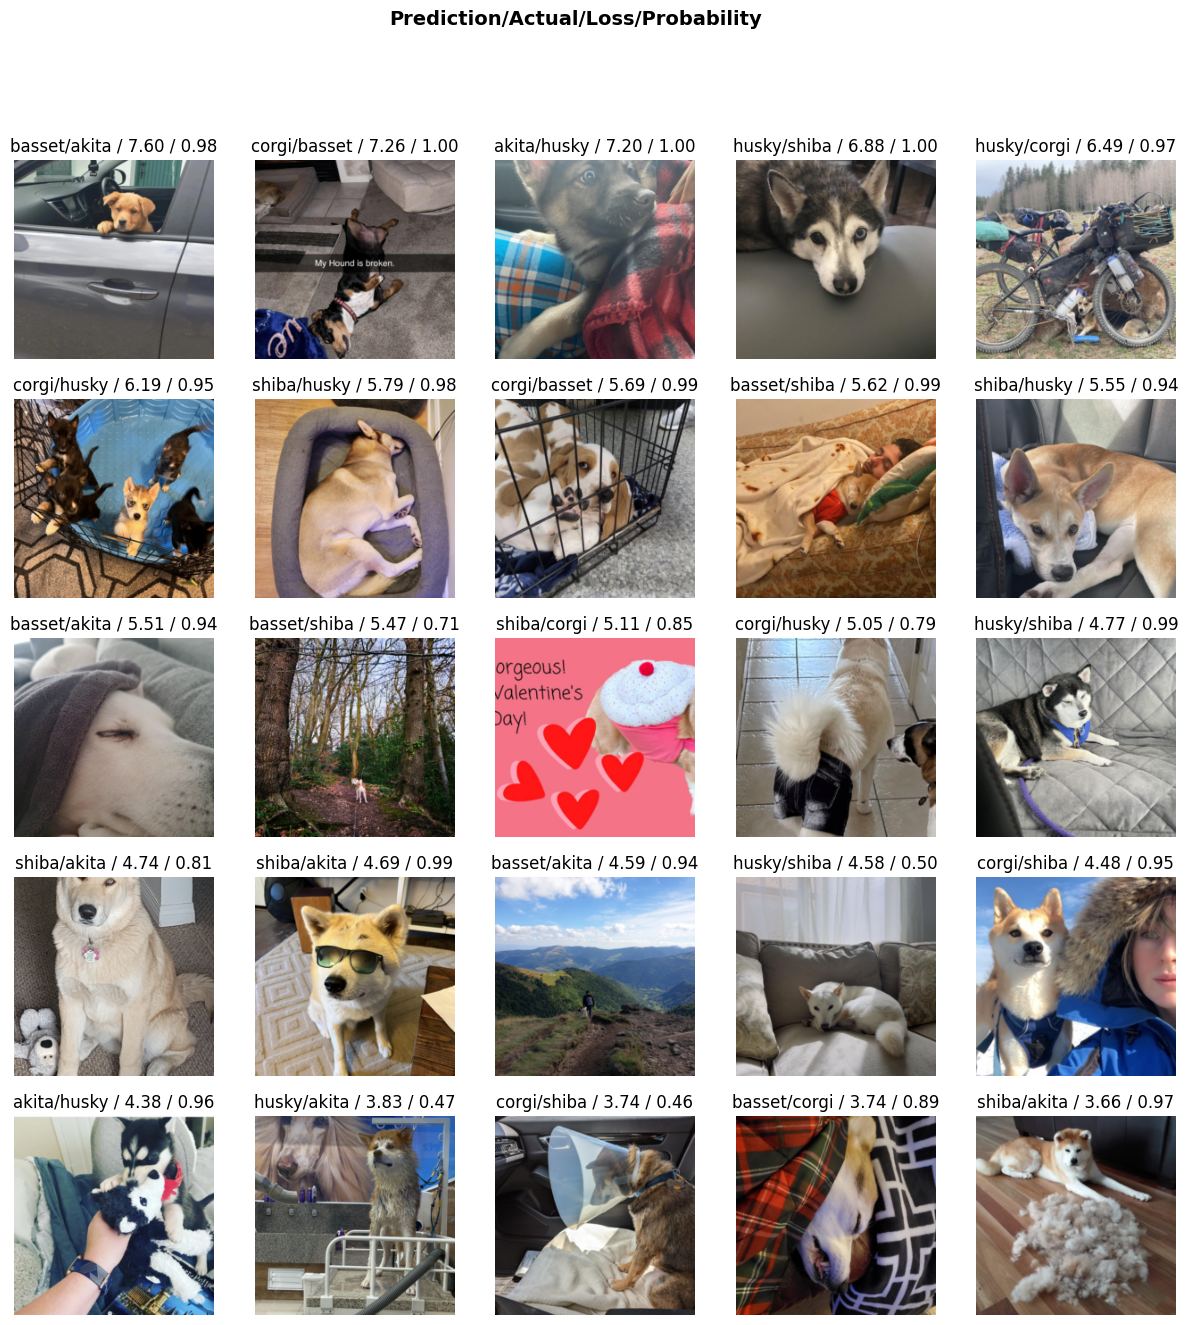

In [17]:
interp.plot_top_losses(25)

/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


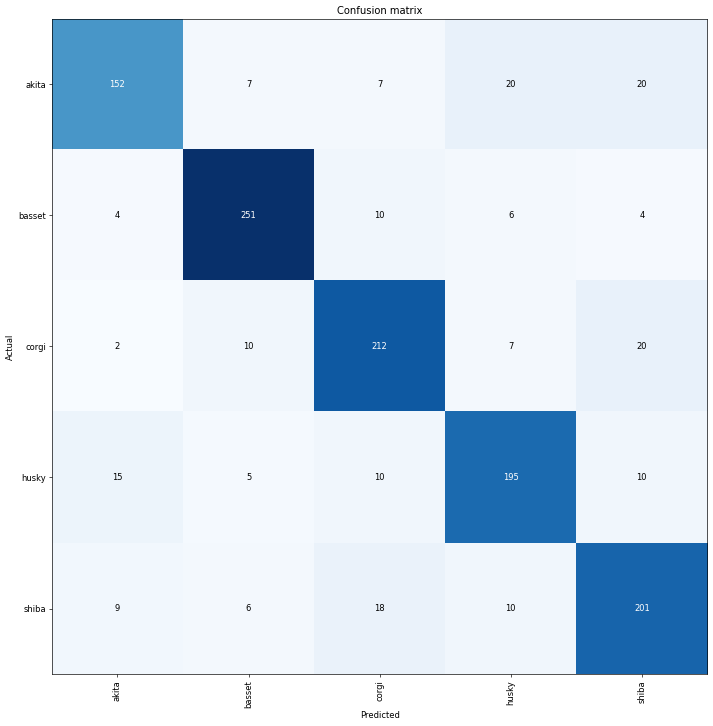

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## resnet101

In [19]:
learn = vision_learner(data, resnet101, metrics=error_rate)

/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/the220th/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [20]:
learn.fit_one_cycle(4)

/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 7.93 GiB total capacity; 5.79 GiB already allocated; 57.62 MiB free; 5.96 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
interp.plot_top_losses(25)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)